# Black Friday Dataset EDA And Feature Engineering
## Cleaning and preparing the data for model training

In [281]:
## dataset link: https://www.kaggle.com/sdolezel/black-friday?select=train.csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Problem Statement
A retail company “ABC Private Limited” wants to understand the customer purchase behaviour (specifically, purchase amount) against various products of different categories. They have shared purchase summary of various customers for selected high volume products from last month. The data set also contains customer demographics (age, gender, marital status, city_type, stay_in_current_city), product details (product_id and product category) and Total purchase_amount from last month.

Now, they want to build a model to predict the purchase amount of customer against various products which will help them to create personalized offer for customers against different products.

In [282]:
#importing the dataset
df_train=pd.read_csv('/Users/madhu/Desktop/Data Science/iNeuron/EDA/black friday dataset/train.csv')
df_train.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [283]:
##  import the test data
df_test=pd.read_csv('/Users/madhu/Desktop/Data Science/iNeuron/EDA/black friday dataset/test.csv')
df_test.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,NaN
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,NaN
2,1000010,P00288442,F,36-45,1,B,4+,1,5,14.0,NaN
3,1000010,P00145342,F,36-45,1,B,4+,1,4,9.0,NaN
4,1000011,P00053842,F,26-35,1,C,1,0,4,5.0,12.0


In [284]:
#append both train and test data. test data will get appended after the last row of train data.
df = df_train.append(df_test)
df.head()

/var/folders/y4/6_3sgdc945dcscpnt6p8q7100000gn/T/ipykernel_22278/2285684959.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df_train.append(df_test)


,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969.0


In [285]:
# Basic
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 783667 entries, 0 to 233598
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     783667 non-null  int64  
 1   Product_ID                  783667 non-null  object 
 2   Gender                      783667 non-null  object 
 3   Age                         783667 non-null  object 
 4   Occupation                  783667 non-null  int64  
 5   City_Category               783667 non-null  object 
 6   Stay_In_Current_City_Years  783667 non-null  object 
 7   Marital_Status              783667 non-null  int64  
 8   Product_Category_1          783667 non-null  int64  
 9   Product_Category_2          537685 non-null  float64
 10  Product_Category_3          237858 non-null  float64
 11  Purchase                    550068 non-null  float64
dtypes: float64(3), int64(4), object(5)
memory usage: 77.7+ MB


In [286]:
df.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,7.836670e+05,783667.000000,783667.000000,783667.000000,537685.000000,237858.000000,550068.000000
mean,1.003029e+06,8.079300,0.409777,5.366196,9.844506,12.668605,9263.968713
std,1.727267e+03,6.522206,0.491793,3.878160,5.089093,4.125510,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001519e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003075e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


## Delete the unecessary features
for eg. User_ID in this case

In [287]:
# axis = 1 means y axis i.e column and inplace = True means will drop the column permanently.
df.drop('User_ID', axis = 1, inplace = True)

In [288]:
df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969.0


## Convert catogrical data to numerical data using encoding
### HAndling categorical feature Gender

In [289]:
# Method 1
# by using get_dummies function in pandas.
# df['Gender'] = pd.get_dummies(df['Gender'], drop_first= 1)

In [290]:
# Method 2
# By giving the numerical value to the particular catogrical value.
df['Gender'] = df['Gender'].map({'F':0, 'M':1})

In [291]:
df

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,0,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,P00248942,0,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,P00087842,0,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,P00085442,0,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,P00285442,1,55+,16,C,4+,0,8,NaN,NaN,7969.0
...,...,...,...,...,...,...,...,...,...,...,...
233594,P00118942,0,26-35,15,B,4+,1,8,NaN,NaN,NaN
233595,P00254642,0,26-35,15,B,4+,1,5,8.0,NaN,NaN
233596,P00031842,0,26-35,15,B,4+,1,1,5.0,12.0,NaN
233597,P00124742,0,46-50,1,C,4+,0,10,16.0,NaN,NaN


### Handle categorical feature Age

In [292]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 783667 entries, 0 to 233598
Data columns (total 11 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Product_ID                  783667 non-null  object 
 1   Gender                      783667 non-null  int64  
 2   Age                         783667 non-null  object 
 3   Occupation                  783667 non-null  int64  
 4   City_Category               783667 non-null  object 
 5   Stay_In_Current_City_Years  783667 non-null  object 
 6   Marital_Status              783667 non-null  int64  
 7   Product_Category_1          783667 non-null  int64  
 8   Product_Category_2          537685 non-null  float64
 9   Product_Category_3          237858 non-null  float64
 10  Purchase                    550068 non-null  float64
dtypes: float64(3), int64(4), object(4)
memory usage: 71.7+ MB


In [293]:
df['Age'].unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

In [294]:
#pd.get_dummies(df['Age'],drop_first=True)--> This is not a good practice so better go for Target ordinal encoding.
# Ordinal encoding means give the rank or value in order.

df['Age'] = df['Age'].map({'0-17':1, '18-25':2, '26-35':3, '36-45':4, '46-50':5, '51-55':6, '55+':7})

In [295]:
# ##second technqiue--> Not a good practice
# from sklearn import preprocessing
 
# # label_encoder object knows how to understand word labels.
# label_encoder = preprocessing.LabelEncoder()
 
# # Encode labels in column 'species'.
# df['Age']= label_encoder.fit_transform(df['Age'])
 
# df['Age'].unique()

In [296]:
df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,0,1,10,A,2,0,3,NaN,NaN,8370.0
1,P00248942,0,1,10,A,2,0,1,6.0,14.0,15200.0
2,P00087842,0,1,10,A,2,0,12,NaN,NaN,1422.0
3,P00085442,0,1,10,A,2,0,12,14.0,NaN,1057.0
4,P00285442,1,7,16,C,4+,0,8,NaN,NaN,7969.0


### Hanndling Catogrical feature City_Category

In [297]:
# Drop one column 'A' Since 2 columns are enough to represent 3 columns.
df_city = pd.get_dummies(df['City_Category'],drop_first= 1 )

In [298]:
df_city.head()

,B,C
0,0,0
1,0,0
2,0,0
3,0,0
4,0,1


In [299]:
# Now concatenate df with df_city
df = pd.concat([df,df_city], axis = 1 )
df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,P00069042,0,1,10,A,2,0,3,NaN,NaN,8370.0,0,0
1,P00248942,0,1,10,A,2,0,1,6.0,14.0,15200.0,0,0
2,P00087842,0,1,10,A,2,0,12,NaN,NaN,1422.0,0,0
3,P00085442,0,1,10,A,2,0,12,14.0,NaN,1057.0,0,0
4,P00285442,1,7,16,C,4+,0,8,NaN,NaN,7969.0,0,1


In [300]:
# Now 'City_Category' feature is no more required.
df.drop(['City_Category'], axis = 1, inplace= True)
df.head()

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,P00069042,0,1,10,2,0,3,NaN,NaN,8370.0,0,0
1,P00248942,0,1,10,2,0,1,6.0,14.0,15200.0,0,0
2,P00087842,0,1,10,2,0,12,NaN,NaN,1422.0,0,0
3,P00085442,0,1,10,2,0,12,14.0,NaN,1057.0,0,0
4,P00285442,1,7,16,4+,0,8,NaN,NaN,7969.0,0,1


## Handle missing Values

In [301]:
df.isnull().sum()

Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            245982
Product_Category_3            545809
Purchase                      233599
B                                  0
C                                  0
dtype: int64

### Focus on replacing missing values

In [302]:

df['Product_Category_2'].unique()

array([nan,  6., 14.,  2.,  8., 15., 16., 11.,  5.,  3.,  4., 12.,  9.,
       10., 17., 13.,  7., 18.])

In [303]:
df['Product_Category_2'].value_counts()

8.0     91317
14.0    78834
2.0     70498
16.0    61687
15.0    54114
5.0     37165
4.0     36705
6.0     23575
11.0    20230
17.0    19104
13.0    15054
9.0      8177
12.0     7801
10.0     4420
3.0      4123
18.0     4027
7.0       854
Name: Product_Category_2, dtype: int64

Observation:- Here we can see that one particular no. has been repeated no. of times. So let's replace it with mode.

In [304]:
# Find the mode of Product_Category_2
df['Product_Category_2'].mode()

0    8.0
Name: Product_Category_2, dtype: float64

Observation:- It means most of the time 8 has been repeated. Here we are getting 2 values one is 0 (which is index of 8) and other one is 8 and it's a series so to get 8 we need to use indexing. So let's write code to to get 8.

In [305]:
df['Product_Category_2'].mode()[0]

8.0

In [306]:
# Now replace the null value of 'Product_Category_2' with mode
# fillna()--> we use this function to replace the NaN values
df['Product_Category_2'] = df['Product_Category_2'].fillna(df['Product_Category_2'].mode()[0])

In [307]:
# Again check the null values in 'Product_Category_2' column
df['Product_Category_2'].isnull().sum()

0

In [308]:
# Check for 'Product_Category_3'
df['Product_Category_3'].unique()

array([nan, 14., 17.,  5.,  4., 16., 15.,  8.,  9., 13.,  6., 12.,  3.,
       18., 11., 10.])

In [309]:

df['Product_Category_3'].value_counts()

16.0    46469
15.0    39968
14.0    26283
17.0    23818
5.0     23799
8.0     17861
9.0     16532
12.0    13115
13.0     7849
6.0      6888
18.0     6621
4.0      2691
11.0     2585
10.0     2501
3.0       878
Name: Product_Category_3, dtype: int64

In [310]:
df['Product_Category_3'].mode()[0]

16.0

In [311]:
# Now replace the null value of 'Product_Category_3' with mode
df['Product_Category_3'] = df['Product_Category_3'].fillna(df['Product_Category_3'].mode()[0])

In [312]:
df['Product_Category_3'].isnull().sum()

0

In [313]:
df.head()

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,P00069042,0,1,10,2,0,3,8.0,16.0,8370.0,0,0
1,P00248942,0,1,10,2,0,1,6.0,14.0,15200.0,0,0
2,P00087842,0,1,10,2,0,12,8.0,16.0,1422.0,0,0
3,P00085442,0,1,10,2,0,12,14.0,16.0,1057.0,0,0
4,P00285442,1,7,16,4+,0,8,8.0,16.0,7969.0,0,1


In [314]:
df.shape

(783667, 12)

In [315]:
df['Stay_In_Current_City_Years'].unique()

array(['2', '4+', '3', '1', '0'], dtype=object)

In [316]:
#str.replace('+','')--> we use this function to replace '+' with ''(empty  string)
df['Stay_In_Current_City_Years'] = df['Stay_In_Current_City_Years'].str.replace('+','')

/var/folders/y4/6_3sgdc945dcscpnt6p8q7100000gn/T/ipykernel_22278/3324697127.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Stay_In_Current_City_Years'] = df['Stay_In_Current_City_Years'].str.replace('+','')


In [317]:
df['Stay_In_Current_City_Years'].unique()

array(['2', '4', '3', '1', '0'], dtype=object)

In [318]:
df.head()

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,P00069042,0,1,10,2,0,3,8.0,16.0,8370.0,0,0
1,P00248942,0,1,10,2,0,1,6.0,14.0,15200.0,0,0
2,P00087842,0,1,10,2,0,12,8.0,16.0,1422.0,0,0
3,P00085442,0,1,10,2,0,12,14.0,16.0,1057.0,0,0
4,P00285442,1,7,16,4,0,8,8.0,16.0,7969.0,0,1


In [319]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 783667 entries, 0 to 233598
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Product_ID                  783667 non-null  object 
 1   Gender                      783667 non-null  int64  
 2   Age                         783667 non-null  int64  
 3   Occupation                  783667 non-null  int64  
 4   Stay_In_Current_City_Years  783667 non-null  object 
 5   Marital_Status              783667 non-null  int64  
 6   Product_Category_1          783667 non-null  int64  
 7   Product_Category_2          783667 non-null  float64
 8   Product_Category_3          783667 non-null  float64
 9   Purchase                    550068 non-null  float64
 10  B                           783667 non-null  uint8  
 11  C                           783667 non-null  uint8  
dtypes: float64(3), int64(5), object(2), uint8(2)
memory usage: 67.3+ MB


In [320]:
# Stay_In_Current_City_Years is an object which we need to convert into int.
df['Stay_In_Current_City_Years'] = df['Stay_In_Current_City_Years'].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 783667 entries, 0 to 233598
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Product_ID                  783667 non-null  object 
 1   Gender                      783667 non-null  int64  
 2   Age                         783667 non-null  int64  
 3   Occupation                  783667 non-null  int64  
 4   Stay_In_Current_City_Years  783667 non-null  int64  
 5   Marital_Status              783667 non-null  int64  
 6   Product_Category_1          783667 non-null  int64  
 7   Product_Category_2          783667 non-null  float64
 8   Product_Category_3          783667 non-null  float64
 9   Purchase                    550068 non-null  float64
 10  B                           783667 non-null  uint8  
 11  C                           783667 non-null  uint8  
dtypes: float64(3), int64(6), object(1), uint8(2)
memory usage: 67.3+ MB


In [254]:
# covert B and C column to int
df['B'] = df['B'].astype(int)
df['C'] = df['C'].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 783667 entries, 0 to 233598
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Product_ID                  783667 non-null  object 
 1   Gender                      783667 non-null  int64  
 2   Age                         783667 non-null  int64  
 3   Occupation                  783667 non-null  int64  
 4   Stay_In_Current_City_Years  783667 non-null  int64  
 5   Marital_Status              783667 non-null  int64  
 6   Product_Category_1          783667 non-null  int64  
 7   Product_Category_2          783667 non-null  float64
 8   Product_Category_3          783667 non-null  float64
 9   Purchase                    550068 non-null  float64
 10  B                           783667 non-null  int64  
 11  C                           783667 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 77.7+ MB


### Barplot

<AxesSubplot:xlabel='Age', ylabel='Purchase'>

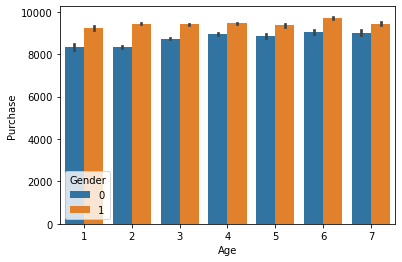

In [191]:
##Visualisation Age vs Purchased
sns.barplot('Age','Purchase',hue = 'Gender',data = df)

In [ ]:
## Visualization of Purchase with occupation
sns.barplot('Purchase', 'Occupation', hue = 'Gender',data = df)

In [ ]:
# Since dataset is too big and my computer is unable to compute it.

In [ ]:
## Visualization of Product_Category_1 and Purchase.
sns.barplot('Product_Category_1','Purchase', hue = 'Gender', data = df)

In [ ]:
## Visualization of Product_Category_2 and Purchase.
sns.barplot('Product_Category_1','Purchase', hue = 'Gender', data = df')

In [ ]:
## Visualization of Product_Category_3 and Purchase.
sns.barplot('Product_Category_3','Purchase',hue='Gender',data=df)

In [ ]:
# Product_Category_1 is bought the most since it went till 20000.

In [321]:
df.head()

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,P00069042,0,1,10,2,0,3,8.0,16.0,8370.0,0,0
1,P00248942,0,1,10,2,0,1,6.0,14.0,15200.0,0,0
2,P00087842,0,1,10,2,0,12,8.0,16.0,1422.0,0,0
3,P00085442,0,1,10,2,0,12,14.0,16.0,1057.0,0,0
4,P00285442,1,7,16,4,0,8,8.0,16.0,7969.0,0,1


In [322]:
# These many Null values are there inside Purchase column
df['Purchase'].isnull().sum()

233599

In [323]:
# Now we need to divide the o/p into train and test data for that
# non null purchase data i.e dependent data or o/p data along with other columns comes under training data
df_train = df[~df['Purchase'].isnull()]

In [324]:
# Purchase data i.e o/p data or dependent data with null value along with other columns comes under test data hence
df_test =df[df['Purchase'].isnull()]

In [259]:
# X train data all other columns without purchase column
X=df_train.drop('Purchase',axis=1)

In [260]:
X.head()

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,B,C
0,P00069042,0,1,10,2,0,3,8.0,16.0,0,0
1,P00248942,0,1,10,2,0,1,6.0,14.0,0,0
2,P00087842,0,1,10,2,0,12,8.0,16.0,0,0
3,P00085442,0,1,10,2,0,12,14.0,16.0,0,0
4,P00285442,1,7,16,4,0,8,8.0,16.0,0,1


In [261]:
# y train data with only non null purchase column
y = df_train['Purchase']

In [262]:
y

0          8370.0
1         15200.0
2          1422.0
3          1057.0
4          7969.0
           ...   
550063      368.0
550064      371.0
550065      137.0
550066      365.0
550067      490.0
Name: Purchase, Length: 550068, dtype: float64

## Split of train and test data

In [263]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)

In [266]:
# Drop 'Product_ID' as it is irrelevant data
X_train.drop('Product_ID', axis = 1, inplace=True)
X_test.drop('Product_ID', axis = 1, inplace=True)

In [267]:
X_train

,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,B,C
396876,1,2,14,3,0,1,2.0,16.0,1,0
433826,1,6,0,0,1,8,16.0,16.0,0,0
516298,1,4,17,0,0,3,4.0,12.0,0,1
193380,1,3,4,1,0,8,16.0,16.0,1,0
273542,0,4,20,3,1,3,4.0,12.0,1,0
...,...,...,...,...,...,...,...,...,...,...
110268,1,5,17,2,0,5,8.0,16.0,0,1
259178,1,3,14,2,1,5,8.0,16.0,0,1
365838,0,2,1,1,0,5,8.0,16.0,1,0
131932,0,2,4,2,0,8,14.0,16.0,1,0


In [268]:
X_test

,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,B,C
84432,1,6,19,3,0,1,2.0,16.0,0,1
72724,0,4,11,1,0,1,15.0,16.0,1,0
197032,0,4,0,2,1,8,15.0,16.0,0,0
353704,1,2,4,3,0,1,15.0,16.0,0,0
91198,1,2,4,0,0,6,8.0,16.0,1,0
...,...,...,...,...,...,...,...,...,...,...
196106,1,4,0,1,1,8,8.0,16.0,1,0
109474,0,4,1,1,0,11,15.0,16.0,0,1
433228,1,2,2,2,0,3,5.0,16.0,0,1
271831,1,4,7,1,0,1,2.0,15.0,0,1


In [269]:
y_train

396876    19307.0
433826     7859.0
516298    10718.0
193380     9823.0
273542    13702.0
           ...   
110268     1862.0
259178     8623.0
365838     6954.0
131932     6151.0
121958     7146.0
Name: Purchase, Length: 368545, dtype: float64

In [270]:
y_test

84432     19142.0
72724     15513.0
197032     7802.0
353704    15455.0
91198      4492.0
           ...   
196106     9787.0
109474     3198.0
433228     5434.0
271831    19051.0
477613    11896.0
Name: Purchase, Length: 181523, dtype: float64

### Feature Scaling

In [265]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()


In [277]:
X_train = scaler.fit_transform(X_train)
y_train = scaler.transform(X_test)

/Users/madhu/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


In [278]:
X_train

array([[ 0.57141282, -1.10505734,  0.90867822, ...,  0.36891877,
         1.17569512, -0.67282374],
       [ 0.57141282,  1.84716932, -1.23820419, ...,  0.36891877,
        -0.85056064, -0.67282374],
       [ 0.57141282,  0.37105599,  1.36872445, ..., -1.09182956,
        -0.85056064,  1.48627336],
       ...,
       [-1.75004823, -1.10505734, -1.08485545, ...,  0.36891877,
         1.17569512, -0.67282374],
       [-1.75004823, -1.10505734, -0.62480922, ...,  0.36891877,
         1.17569512, -0.67282374],
       [-1.75004823, -1.10505734, -0.93150671, ...,  0.36891877,
        -0.85056064, -0.67282374]])

In [279]:
y_train

array([[ 1.00000000e+00,  6.00000000e+00,  1.90000000e+01, ...,
         1.60000000e+01, -1.26474660e-17,  1.00000000e+00],
       [-6.84042824e-17,  4.00000000e+00,  1.10000000e+01, ...,
         1.60000000e+01,  1.00000000e+00, -7.36483537e-17],
       [-6.84042824e-17,  4.00000000e+00, -2.53142116e-17, ...,
         1.60000000e+01, -1.26474660e-17, -7.36483537e-17],
       ...,
       [ 1.00000000e+00,  2.00000000e+00,  2.00000000e+00, ...,
         1.60000000e+01, -1.26474660e-17,  1.00000000e+00],
       [ 1.00000000e+00,  4.00000000e+00,  7.00000000e+00, ...,
         1.50000000e+01, -1.26474660e-17,  1.00000000e+00],
       [ 1.00000000e+00,  2.00000000e+00,  4.00000000e+00, ...,
         1.60000000e+01,  1.00000000e+00, -7.36483537e-17]])